In [1]:
#### Create Plots based on OSCAR xml files ####
# analysis of specific variables

# used python version 3.10.6

In [5]:
import xml.etree.ElementTree as ET
import urllib.request
import csv
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import json
import re
import os
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.lines as mlines

In [16]:
id = "0-404-0-63707"

In [17]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


url = "https://oscar.wmo.int/oai/provider?verb=GetRecord&metadataPrefix=wmdr&identifier=%20" + id
xml = urlopen(url).read()
soup = BeautifulSoup(xml, 'xml')

# Retrieve all of the anchor tags
tags = soup('OAI-PMH')
# print(tags)



In [3]:
%%capture cap --no-stderr
print(tags)

In [8]:
with open(os.getcwd()+"/Files/File_"+id+".txt", 'w') as f:
    f.write(cap.stdout)

In [11]:
# get variables at a station

f = open(os.getcwd()+'/stations.json')
data = json.load(f)

df = pd.DataFrame(data["stations"])
df["observedProperties_unique"] = range(0,len(df))
pd.options.mode.chained_assignment = None

from functools import reduce
 
def unique(list1):
    # Print directly by using * symbol
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    return(ans)

for i in range(0,len(df)):
    unique_codes = unique(df["observedProperties"][i])
    df["observedProperties_unique"][i] = unique_codes

variables = df[df["wigosId"]==id]["observedProperties_unique"].tolist()
f=open('/home/sdanioth/Documents/git/OSCAR_analysis/Files/File_'+id+'.txt')
lines=f.readlines()
all_dates = []

# prepare data frame #
df_station = pd.DataFrame(np.nan, index=[0],columns=["beginPosition", "endPosition", "station", "variable"])

for var in range(0,len(variables[0])):
    variable = variables[0][var]
    station = id

    # find line numbers containing the WMDR number of the observed property
    numbers = []

    with open('/home/sdanioth/Documents/git/OSCAR_analysis/Files/File_'+id+'.txt') as myFile:
        for num, line in enumerate(myFile, 1):
            if variables[0][var] in line:
                numbers.append(num)

    # find the line numbers with <om:observedProperty
    obs = "observedProperty"
    numbers_obs = []

    for n in numbers:
        if obs in lines[n-1]:
            numbers_obs.append(n)

    ### read 20 lines before "observedProperty" line to get "beginPosition" (& "endPosition")
    for n in numbers_obs:
        start = "beginPosition"
        end = "endPosition"
        line_numbers = range(n-50,n)

        f=open('/home/sdanioth/Documents/git/OSCAR_analysis/Files/File_'+id+'.txt')
        lines=f.readlines()
        positions = []

        for n in line_numbers:
            print("n: ", n)
            if start in lines[n]:
                beginning = re.findall(r'\d{4}-\d{2}-\d{2}',lines[n])
                if beginning:
                    pd.to_datetime(beginning, format='%Y-%m-%d')
                    positions.append(beginning[0])
                else:
                    positions.append(np.nan)
                    
            elif end in lines[n]:
                ending = re.findall(r'\d{4}-\d{2}-\d{2}',lines[n])
                if ending:
                    pd.to_datetime(ending, format='%Y-%m-%d')
                    positions.append(ending[0])
                else:
                    positions.append(pd.Timestamp.today().strftime("%Y-%m-%d"))

        beginPosition  = positions[0]
        endPosition = positions[1]
        new_row = {"beginPosition":beginPosition,"endPosition":endPosition,"station":station,"variable":variable}
        df_station.loc[len(df_station)] = new_row 

    
df_station.drop([0], axis=0, inplace=True)
print(df_station)



n:  245
n:  246
n:  247
n:  248
n:  249
n:  250
n:  251
n:  252
n:  253
n:  254
n:  255
n:  256
n:  257
n:  258
n:  259
n:  260
n:  261
n:  262
n:  263
n:  264
n:  265
n:  266
n:  267
n:  268
n:  269
n:  270
n:  271
n:  272
n:  273
n:  274
n:  275
n:  276
n:  277
n:  278
n:  279
n:  280
n:  281
n:  282
n:  283
n:  284
n:  285
n:  286
n:  287
n:  288
n:  289
n:  290
n:  291
n:  292
n:  293
n:  294
n:  334
n:  335
n:  336
n:  337
n:  338
n:  339
n:  340
n:  341
n:  342
n:  343
n:  344
n:  345
n:  346
n:  347
n:  348
n:  349
n:  350
n:  351
n:  352
n:  353
n:  354
n:  355
n:  356
n:  357
n:  358
n:  359
n:  360
n:  361
n:  362
n:  363
n:  364
n:  365
n:  366
n:  367
n:  368
n:  369
n:  370
n:  371
n:  372
n:  373
n:  374
n:  375
n:  376
n:  377
n:  378
n:  379
n:  380
n:  381
n:  382
n:  383
n:  479
n:  480
n:  481
n:  482
n:  483
n:  484
n:  485
n:  486
n:  487
n:  488
n:  489
n:  490
n:  491
n:  492
n:  493
n:  494
n:  495
n:  496
n:  497
n:  498
n:  499
n:  500
n:  501
n:  502
n:  503


In [12]:
# combine 3 dictionaries (Atmosphere, Ocean & Terrestrial)

with open(os.getcwd()+'/WMDR_dictionaries/'+"ObservedVariableAtmosphere_WMDR"+'_dictionary.json') as f:
    dictionary = json.loads(f.read())


with open(os.getcwd()+'/WMDR_dictionaries/'+"ObservedVariableOcean_WMDR"+'_dictionary.json') as f:
    dictionary_Ocean = json.loads(f.read())   

dictionary.update(dictionary_Ocean)

with open(os.getcwd()+'/WMDR_dictionaries/'+"ObservedVariableTerrestrial_WMDR"+'_dictionary.json') as f:
    dictionary_Terrestrial = json.loads(f.read())

dictionary.update(dictionary_Terrestrial)

variables = df_station["variable"]

df_station["variables_names"] = [(list(dictionary.keys())[list(dictionary.values()).index(str(vari))]) for vari in variables]
df_station


,beginPosition,endPosition,station,variable,variables_names
1,2016-04-29,2023-10-20,0-20000-0-63687,179,Cloud amount
2,2023-05-16,2023-10-20,0-20000-0-63687,210,Amount of precipitation
3,2020-12-13,2023-10-20,0-20000-0-63687,216,Atmospheric pressure
4,2020-12-14,2023-10-20,0-20000-0-63687,224,Air temperature (at specified distance from re...
5,2023-04-30,2023-10-20,0-20000-0-63687,224,Air temperature (at specified distance from re...
6,2016-04-29,2023-10-20,0-20000-0-63687,230,Visibility
7,2020-12-13,2023-10-20,0-20000-0-63687,251,Humidity (at specified distance from reference...
8,2016-04-29,2023-10-20,0-20000-0-63687,265,Past weather
9,2016-04-29,2023-10-20,0-20000-0-63687,531,Cloud base height
10,2016-04-29,2023-10-20,0-20000-0-63687,550,Type of cloud


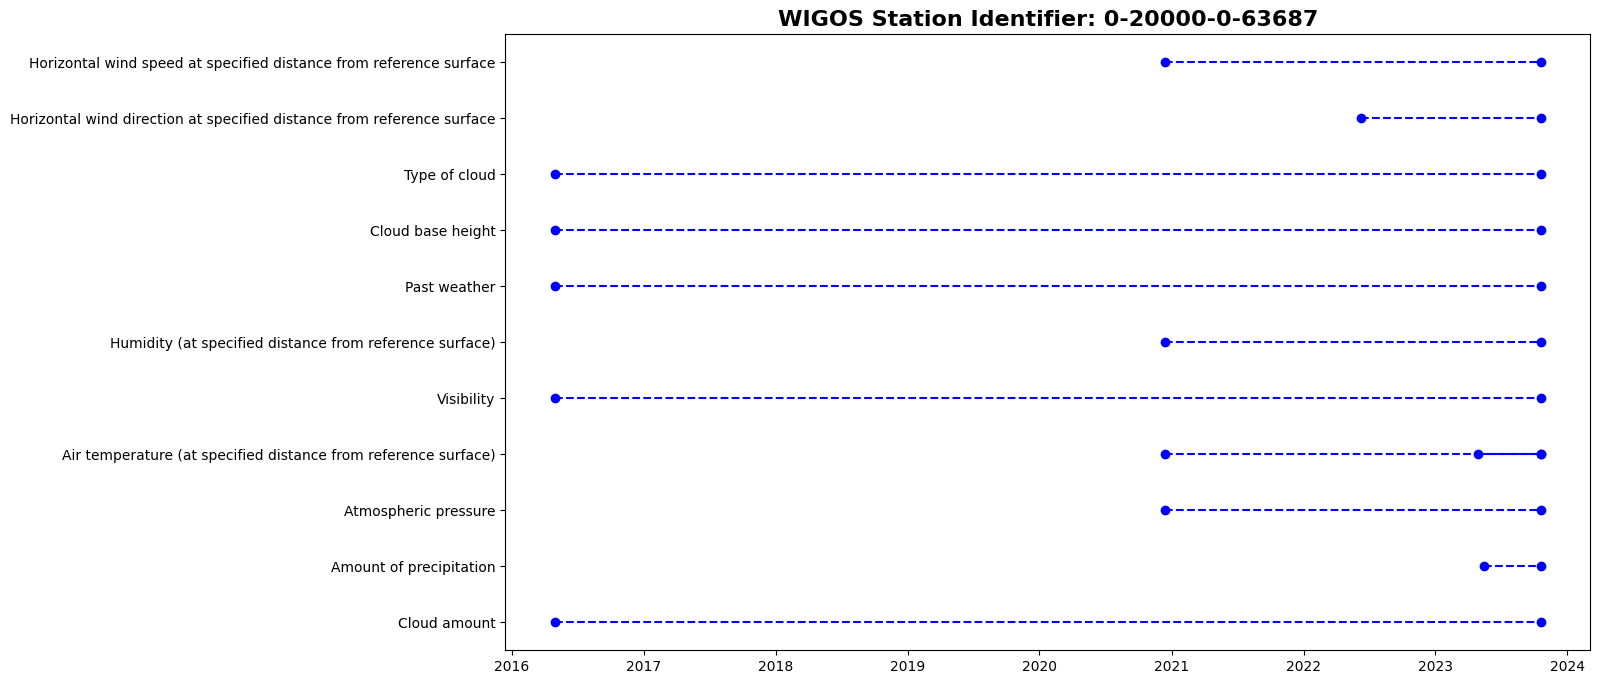

In [13]:
plt.style.use('default')
fig, axes = plt.subplots(1,1, figsize=(14,8))

variables = df[df["wigosId"]==id]["observedProperties_unique"].tolist()

for var in range(0,len(variables[0])):
    df_var = df_station[df_station["variable"]==str(variables[0][var])]

    x_values = [pd.to_datetime(df_var["beginPosition"]), pd.to_datetime(df_var["endPosition"])]
    # print(x_values)
    plt.plot(x_values, [var,var], 'bo', linestyle="--")

# print(variables)
names = []
for var in range(0,len(variables[0])):
    variable_df = df_station[df_station["variable"]==str(variables[0][var])]
    name = variable_df.iloc[0]["variables_names"]
    # print(name)
    names.append(name)
n = range(0,len(names))
plt.yticks(n,names)

# title
plt.title("WIGOS Station Identifier: " + id, fontsize=16, fontweight="bold")


# save figure
fig.savefig(os.getcwd()+"/Plots/Deployments_"+id+".jpeg", bbox_inches='tight')